### ***Required Packages***

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,r2_score,adjusted_rand_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### ***Question_1***

In [17]:
df=pd.read_csv('/content/drive/MyDrive/sem 6/Lab/ML Lab/SOC_LAB1/dataset/KNN/heart_disease_uci.csv')
display(df.head())

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


**Handle Missing values**

In [18]:
features=['id','age','sex','dataset','cp','trestbps','chol','fbs','restecg','thalch','exang','oldpeak','slope','ca','thal']
target=['num']

le=LabelEncoder()
df['sex']=le.fit_transform(df['sex'])
df['dataset']=le.fit_transform(df['dataset'])
df['cp']=le.fit_transform(df['cp'])
df['fbs']=le.fit_transform(df['fbs'])
df['restecg']=le.fit_transform(df['restecg'])
df['exang']=le.fit_transform(df['exang'])
df['slope']=le.fit_transform(df['slope'])
df['thal']=le.fit_transform(df['thal'])



df['trestbps']=df['trestbps'].fillna(df['trestbps'].mean())
df['chol']=df['chol'].fillna(df['chol'].mean())
df['fbs']=df['fbs'].fillna(df['fbs'])
df['restecg']=df['restecg'].fillna(df['restecg'])
df['thalch']=df['thalch'].fillna(df['thalch'].mean())
df['exang']=df['exang'].fillna(df['exang'])
df['oldpeak']=df['oldpeak'].fillna(df['oldpeak'].mean())
df['thal']=df['thal'].fillna(df['thal'].mean())
df['ca']=df['ca'].fillna(df['ca'].mean())
df['slope']=df['slope'].fillna(df['slope'].mean())

print(df.isnull().sum())

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


**Data Split ,Scaling ,KNN Model and Metrics**

In [19]:
x=df[features]
y=df[target]

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


scalers={'MinMax':MinMaxScaler(),'Standard':StandardScaler()}

for name,scaler in scalers.items():
    print(f'Applying {name} Scaling : ')
    scaled_x_train=scaler.fit_transform(X_train)
    scaled_x_test=scaler.transform(X_test)
    for k in [3,5,7,9]:
        knn=KNeighborsClassifier(n_neighbors=k)
        knn.fit(scaled_x_train,y_train)
        y_pred=knn.predict(scaled_x_test)
        print(f"K : {k}")
        print(f'Accuracy Score : {accuracy_score(y_test,y_pred)}')
        print(f'Confusion Matrix : \n{confusion_matrix(y_test,y_pred)}')
        print(f'Classification Report : \n{classification_report(y_test,y_pred)}')

Applying MinMax Scaling : 
K : 3
Accuracy Score : 0.5652173913043478
Confusion Matrix : 
[[69  5  0  1  0]
 [19 29  4  2  0]
 [ 8 12  2  2  1]
 [10  8  4  3  1]
 [ 1  1  1  0  1]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.64      0.92      0.76        75
           1       0.53      0.54      0.53        54
           2       0.18      0.08      0.11        25
           3       0.38      0.12      0.18        26
           4       0.33      0.25      0.29         4

    accuracy                           0.57       184
   macro avg       0.41      0.38      0.37       184
weighted avg       0.50      0.57      0.51       184

K : 5
Accuracy Score : 0.5380434782608695
Confusion Matrix : 
[[68  5  0  2  0]
 [25 21  4  3  1]
 [ 5 12  5  3  0]
 [ 8 11  3  4  0]
 [ 0  1  1  1  1]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.64      0.91      0.75        75
           1       

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parame

K : 5
Accuracy Score : 0.5163043478260869
Confusion Matrix : 
[[67  5  2  1  0]
 [23 24  4  3  0]
 [ 6 12  2  5  0]
 [ 6 13  5  2  0]
 [ 0  2  1  1  0]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.66      0.89      0.76        75
           1       0.43      0.44      0.44        54
           2       0.14      0.08      0.10        25
           3       0.17      0.08      0.11        26
           4       0.00      0.00      0.00         4

    accuracy                           0.52       184
   macro avg       0.28      0.30      0.28       184
weighted avg       0.44      0.52      0.47       184

K : 7
Accuracy Score : 0.5217391304347826
Confusion Matrix : 
[[70  4  1  0  0]
 [27 23  1  3  0]
 [ 3 15  3  4  0]
 [ 8 14  4  0  0]
 [ 0  2  1  1  0]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.65      0.93      0.77        75
           1       0.40      0.43      0.41   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/n

### ***Question_2***

In [20]:
df=pd.read_excel('/content/drive/MyDrive/sem 6/Lab/ML Lab/SOC_LAB1/dataset/KNN/Telco_customer_churn.xlsx')
display(df.head())

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


**Handle Missing Values**

In [21]:
df.drop(columns=['Churn Reason','CustomerID'],inplace=True)
print(df.isnull().sum())

Count                0
Country              0
State                0
City                 0
Zip Code             0
Lat Long             0
Latitude             0
Longitude            0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Label          0
Churn Value          0
Churn Score          0
CLTV                 0
dtype: int64


**Encode Data**

In [22]:
le=LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col]=df[col].astype('str')
    df[col]=le.fit_transform(df[col])

display(df.head())

,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV
0,1,0,0,562,90003,327,33.964131,-118.272783,1,0,...,0,0,1,3,53.85,157,1,1,86,3239
1,1,0,0,562,90005,405,34.059281,-118.307420,0,0,...,0,0,1,2,70.70,925,1,1,67,2701
2,1,0,0,562,90006,393,34.048013,-118.293953,0,0,...,2,0,1,2,99.65,6104,1,1,86,5372
3,1,0,0,562,90010,410,34.062125,-118.315709,0,0,...,2,0,1,2,104.80,2646,1,1,84,5003
4,1,0,0,562,90015,385,34.039224,-118.266293,1,0,...,2,0,1,0,103.70,4265,1,1,89,5340


**Data Split , Model Training and Metrics**

In [23]:
X_train,X_test,y_train,y_test=train_test_split(df.drop(columns=['Churn Value']),df['Churn Value'],test_size=0.2,random_state=42)

scalers=StandardScaler()

X_train_Scaled=scalers.fit_transform(X_train)
X_test_Scaled=scalers.transform(X_test)

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_Scaled,y_train)
y_pred_knn=knn.predict(X_test_Scaled)

logreg=LogisticRegression()
logreg.fit(X_train_Scaled,y_train)
y_pred_logreg=logreg.predict(X_test_Scaled)

print(f'KNN Accuracy : {accuracy_score(y_test,y_pred_knn)}')
print(f'Logistic Regression Accuracy : {accuracy_score(y_test,y_pred_logreg)}')

print(f"KNN f1 Score : {f1_score(y_test,y_pred_knn)}")
print(f"Logistic Regression f1 Score : {f1_score(y_test,y_pred_logreg)}")

print(f"KNN Classification Report : \n{classification_report(y_test,y_pred_knn)}")
print(f"Logistic Regression Classification Report : \n{classification_report(y_test,y_pred_logreg)}")

KNN Accuracy : 0.9879347054648687
Logistic Regression Accuracy : 1.0
KNN f1 Score : 0.9786163522012579
Logistic Regression f1 Score : 1.0
KNN Classification Report : 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1009
           1       0.98      0.97      0.98       400

    accuracy                           0.99      1409
   macro avg       0.99      0.98      0.99      1409
weighted avg       0.99      0.99      0.99      1409

Logistic Regression Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1009
           1       1.00      1.00      1.00       400

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409



### ***Question 3***

In [24]:
df=pd.read_csv('/content/drive/MyDrive/sem 6/Lab/ML Lab/SOC_LAB1/dataset/PCA/all_stocks_5yr.csv')
display(df.head())

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [25]:
features = ['open', 'high', 'low', 'close', 'volume']
data = df[features]

# Handle missing values if any
data = data.dropna()

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


In [26]:
# Perform PCA and retain 90% variance
pca = PCA(n_components=0.90)
data_pca = pca.fit_transform(data_scaled)

# Number of components required to retain 90% variance
num_components = pca.n_components_
print(f'Number of components to retain 90% variance: {num_components}')

Number of components to retain 90% variance: 2


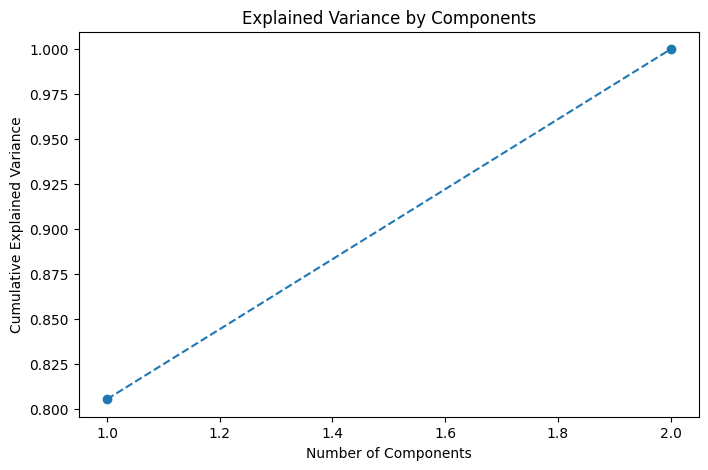

In [27]:
# Plot variance explained by each component
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_components + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.show()

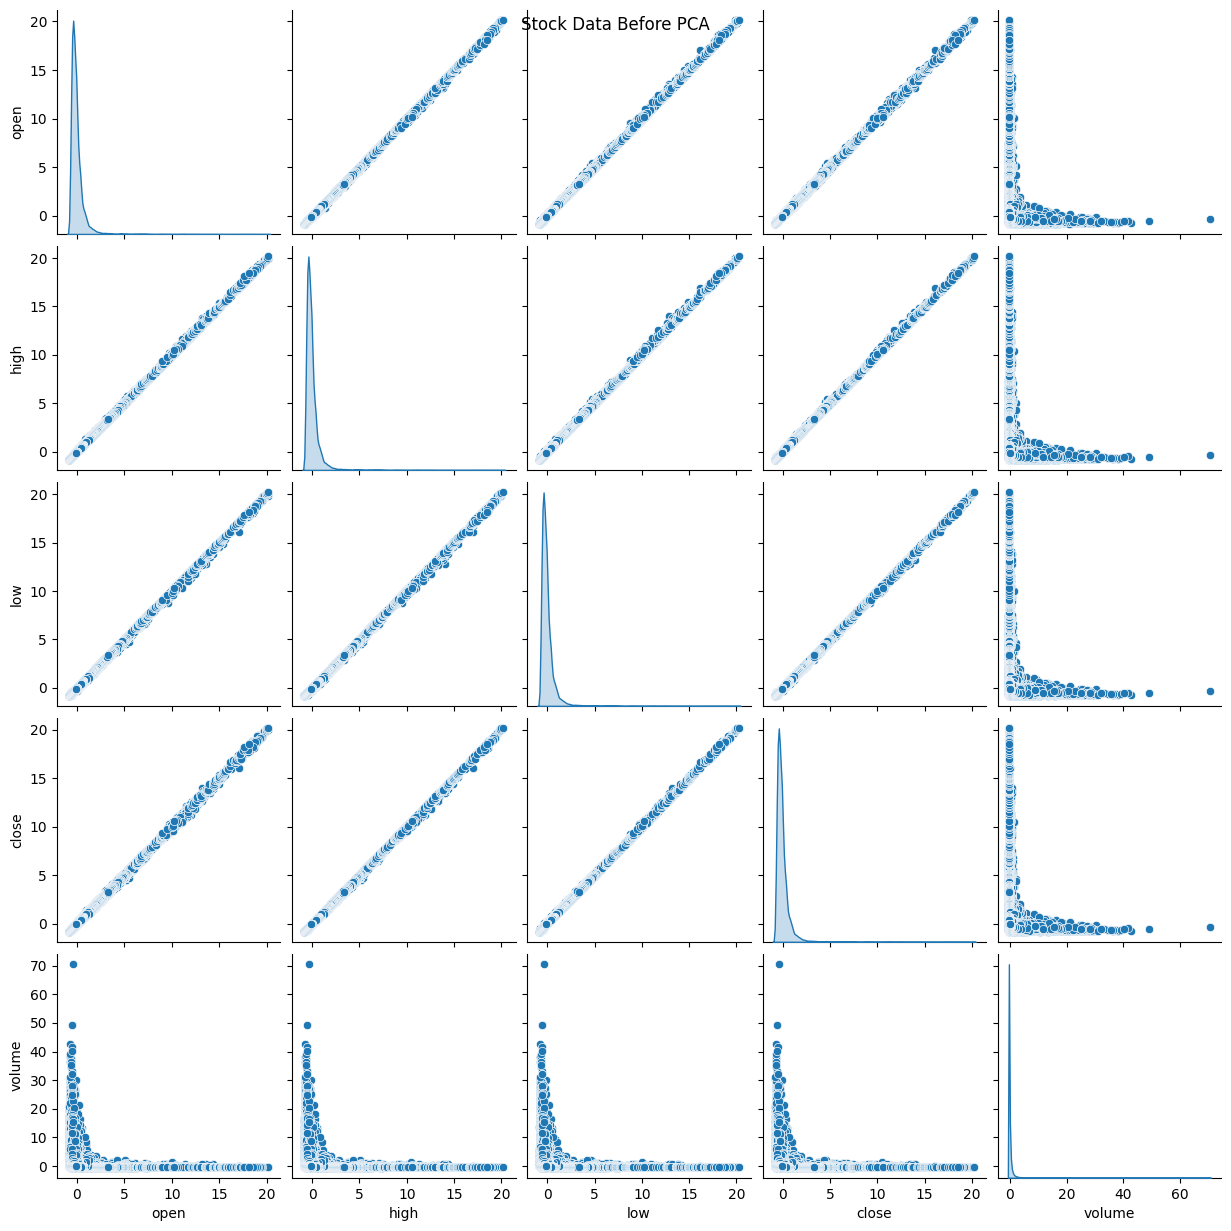

In [28]:
# Scatter plot before PCA
sns.pairplot(pd.DataFrame(data_scaled, columns=features), diag_kind='kde')
plt.suptitle('Stock Data Before PCA')
plt.show()


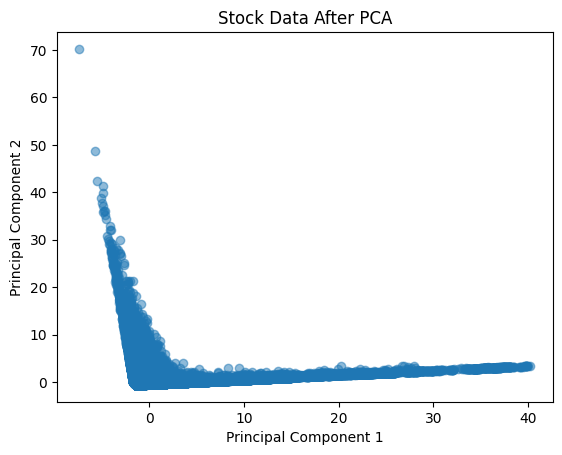

In [29]:
# Scatter plot after PCA
plt.scatter(data_pca[:, 0], data_pca[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Stock Data After PCA')
plt.show()

In [30]:
# Create binary classification target (1 if price increases, 0 if it decreases)
df['price_movement'] = np.where(df['close'].shift(-1) > df['close'], 1, 0)
df = df.dropna()  # Remove NaNs that result from shift operation
y = df['price_movement'].values

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data_pca, y, test_size=0.2, random_state=42)

# Apply KNN classification
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Evaluate KNN classification performance
accuracy = accuracy_score(y_test, y_pred)
print(f'KNN Classification Accuracy: {accuracy}')
print('Classification Report:\n', classification_report(y_test, y_pred))

KNN Classification Accuracy: 0.5029723922911652
Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.46      0.47     59168
           1       0.52      0.54      0.53     64638

    accuracy                           0.50    123806
   macro avg       0.50      0.50      0.50    123806
weighted avg       0.50      0.50      0.50    123806



### ***Question 4***

In [31]:
df=pd.read_csv('/content/drive/MyDrive/sem 6/Lab/ML Lab/SOC_LAB1/dataset/KNN/heart_disease_uci.csv')
display(df.head())
df.info()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [32]:
df=df.drop(columns=['id','ca'])
display(df.head())

for col in df.select_dtypes(include=['object']).columns:
  df[col]=df[col].astype('str')
  df[col]=LabelEncoder().fit_transform(df[col])

display(df.head())

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,normal,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,normal,0


,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,0,3,145.0,233.0,1,0,150.0,0,2.3,0,0,0
1,67,1,0,0,160.0,286.0,0,0,108.0,1,1.5,1,2,2
2,67,1,0,0,120.0,229.0,0,0,129.0,1,2.6,1,3,1
3,37,1,0,2,130.0,250.0,0,2,187.0,0,3.5,0,2,0
4,41,0,0,1,130.0,204.0,0,0,172.0,0,1.4,3,2,0


In [33]:
print(df.isnull().sum())

age          0
sex          0
dataset      0
cp           0
trestbps    59
chol        30
fbs          0
restecg      0
thalch      55
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


In [34]:
df['trestbps']=df['trestbps'].fillna(df['trestbps'].mean())
df['chol']=df['chol'].fillna(df['chol'].mean())
df['thalch']=df['thalch'].fillna(df['thalch'].mean())
df['oldpeak']=df['oldpeak'].fillna(df['oldpeak'].mean())

**Without PCA**

In [35]:
kmeans=KMeans(n_clusters=5,random_state=42,n_init=10)
y_pred_kmeans=kmeans.fit_predict(df.drop(columns=['num']))

ari=adjusted_rand_score(df['num'],y_pred_kmeans)
print(ari)

0.06168280174543043


**With PCA**

In [36]:
pca=PCA(n_components=2)
pca_x=pca.fit_transform(df.drop(columns=['num']))
y_pred_kmeans=kmeans.fit_predict(pca_x)
ari=adjusted_rand_score(df['num'],y_pred_kmeans)
print(ari)

0.06325550201995125


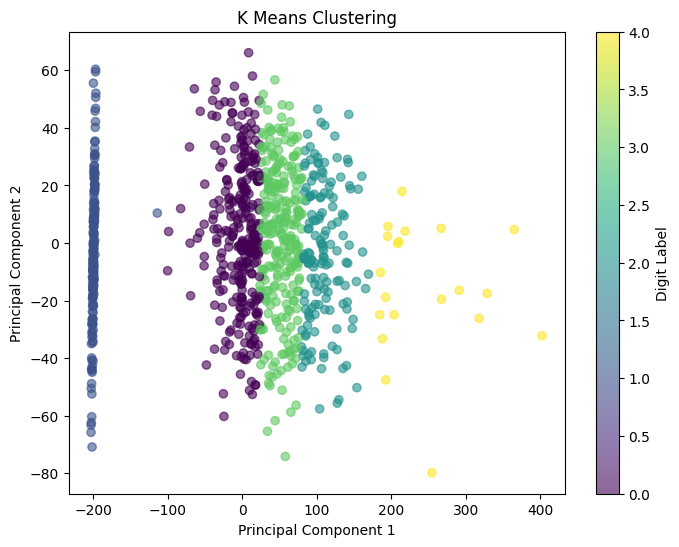

In [37]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_x[:, 0], pca_x[:, 1], c=y_pred_kmeans, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Digit Label')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K Means Clustering')
plt.show()

In [38]:
X=df.drop(columns=['num'])
X_reconstructed = pca.inverse_transform(pca_x)
reconstruction_error = np.mean(np.square(X - X_reconstructed))
print(f"Reconstruction error: {reconstruction_error:.4f}")

Reconstruction error: 31.1595


### ***Question 5***

In [39]:
df=pd.read_csv('/content/drive/MyDrive/sem 6/Lab/ML Lab/SOC_LAB1/dataset/Regression/Housing.csv')
le=LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
  df[col]=le.fit_transform(df[col])
display(df.head())

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


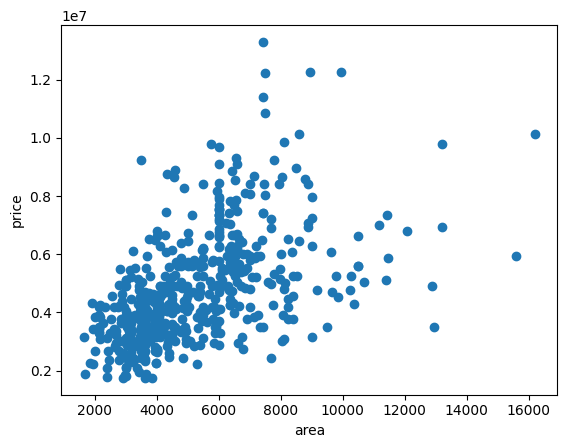

In [40]:
plt.scatter(x=df['area'],y=df['price'])
plt.xlabel('area')
plt.ylabel('price')
plt.show()

In [41]:
features=[
    "area", "bedrooms", "bathrooms", "stories", "mainroad", "guestroom",
    "basement", "hotwaterheating", "airconditioning", "parking",
    "prefarea", "furnishingstatus"
]


x=df[['area']]
y=df['price']

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

lg=LinearRegression()
lg.fit(X_train,y_train)

y_pred=lg.predict(X_test)

print(f'r2_Score : {r2_score(y_test,y_pred)}')

r2_Score : 0.27287851871974644


In [42]:
y=df[features]
x=df['price']

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Reshape X_train to a 2D array
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1) # Reshape X_test as well for consistency

lg=LinearRegression()
lg.fit(X_train,y_train)

y_pred=lg.predict(X_test)

print(f'r2_Score : {r2_score(y_test,y_pred)}')

r2_Score : 0.12278884285733029


In [43]:
features=[
    "area", "bedrooms", "bathrooms", "stories", "mainroad", "guestroom",
    "basement", "hotwaterheating", "airconditioning", "parking",
    "prefarea", "furnishingstatus"
]
X=df[features]
vif_data = pd.DataFrame()
vif_data["Feature"] = features
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(features))]
print("\nVariance Inflation Factor (VIF):")
print(vif_data)


Variance Inflation Factor (VIF):
             Feature        VIF
0               area   8.270130
1           bedrooms  16.368165
2          bathrooms   9.408363
3            stories   7.880723
4           mainroad   6.852485
5          guestroom   1.472838
6           basement   2.013876
7    hotwaterheating   1.089167
8    airconditioning   1.759717
9            parking   1.985880
10          prefarea   1.492621
11  furnishingstatus   2.648467
